### Read in SMSSpamCollection dataset

In [2]:
import pandas as pd
import re
import string
import nltk
%matplotlib inline 

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv('SMSSpamCollection', sep = '\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Text Cleaning

In [3]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('W+', txt)
    txt = [ps.stem(word)for word in tokens if word not in stopwords]
    return txt

In [4]:
import string 
def punctuation_count(txt):
    count = sum([1 for c in txt if c in string.punctuation])
    return 100*count/len(txt)

data['punctuation_%'] = data['msg'].apply(lambda x: len(x)).values
data.head()

,label,msg,punctuation_%
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [5]:
data['msg_len'] = data['msg'].apply(lambda x: len(x)).values
data.head()

,label,msg,punctuation_%,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111,111
1,ham,Ok lar... Joking wif u oni...,29,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,ham,U dun say so early hor... U c already then say...,49,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61


### Evaluate Created Features
### plot message lengths for spam and ham

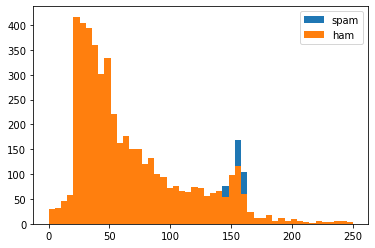

In [6]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

bins = np.linspace(0, 250, 50)
pyplot.hist(data[data['label'] == 'spam']['msg_len'], bins, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['msg_len'], bins, label = 'ham')
pyplot.legend(loc='upper right')
pyplot.show()

# 

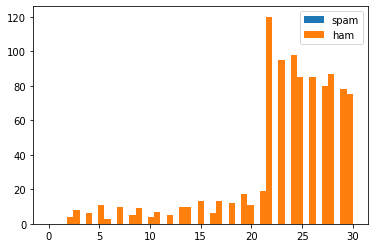

In [7]:
bins = np.linspace(0, 30, 50)
pyplot.hist(data[data['label'] == 'spam']['msg_len'], bins, label = 'spam')
pyplot.hist(data[data['label'] == 'ham']['msg_len'], bins, label = 'ham')
pyplot.legend(loc='upper right')
pyplot.show()

### Transformation Process 

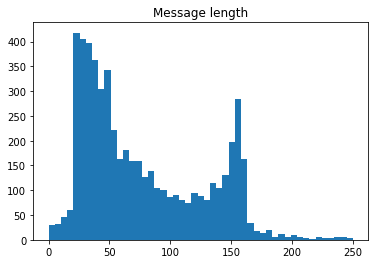

In [8]:
bins = np.linspace(0, 250, 50)
pyplot.hist(data['msg_len'], bins)
pyplot.title('Message length')
pyplot.show()

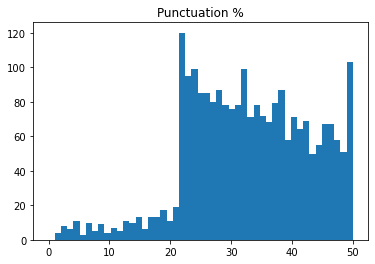

In [9]:
bins = np.linspace(0, 50, 50)
pyplot.hist(data['punctuation_%'], bins)
pyplot.title('Punctuation %')
pyplot.show()

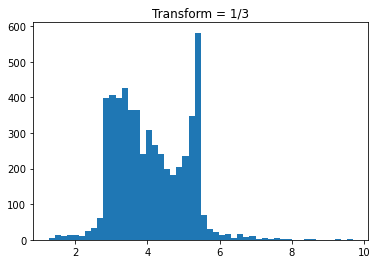

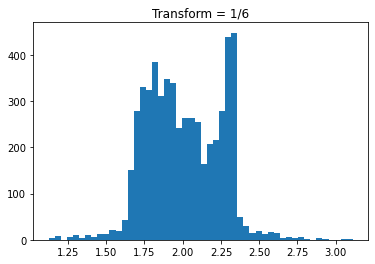

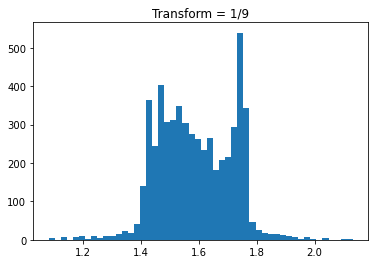

In [10]:
for i in [3, 6, 9]:
    pyplot.hist((data['punctuation_%'])**(1/i), bins=50)
    pyplot.title(f'Transform = 1/{i}')
    pyplot.show()

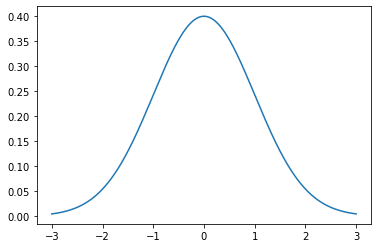

In [11]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x)) # probability density functions (from the arange value) 
plt.show()

## Activity
### Instructions:
1. Use the Probability Density Function (pdf) to transform the data
2. Plot the data using Scatter Plot
3. Use np.random.normal(Value1, Value2, Value3) and plot the results.
Example : weight = np.random.normal (50.0, 80.0, 60.0)  plt.show (weight, 60.0) plt.hist(weight, 60.0)
4. Using the Random Forest Algorithm, Compare the accuracy of the Irish dataset to SMSSpamCollection
5. Change the Train Test to 80 percent training and 20 percent Test. Check the Accuracy

### 1

(array([7.27164773e-03, 3.47078375e-03, 1.50216153e-04, 7.51080766e-05,
        2.76713966e-05, 5.92958499e-06, 7.90611332e-06, 0.00000000e+00,
        1.97652833e-06, 1.97652833e-06]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <BarContainer object of 10 artists>)

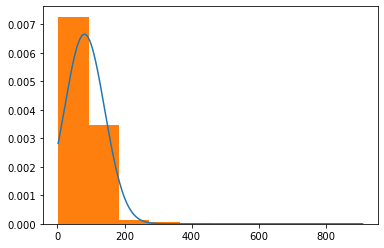

In [12]:
sms = data['msg_len'].sort_values()
fit = norm.pdf(sms, np.mean(sms), np.std(sms))

plt.plot(sms,fit)
plt.hist(sms,density=True)

### 2

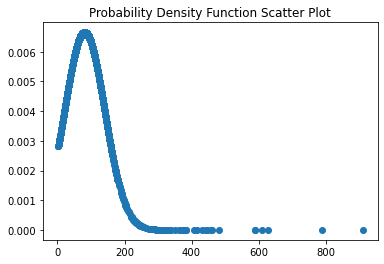

In [13]:
plt.scatter(sms, fit)
plt.title('Probability Density Function Scatter Plot')
plt.show()

### 3 

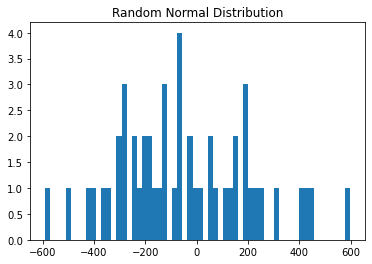

In [14]:
weight = np.random.normal(0, 250, 50)
plt.hist(weight, 60)
pyplot.title('Random Normal Distribution')
plt.show()

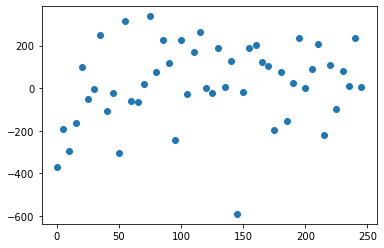

In [15]:
y = np.arange(0,250, 5)
weight = np.random.normal(0, 250, 50)
plt.scatter(y,weight)
plt.show()

### 4 

#### Tf-Idf Vectorizer 

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf.fit_transform(data['msg'])

In [20]:
X = pd.concat([data['msg_len'], data['punctuation_%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X.head()

,msg_len,punctuation_%,0,1,2,3,4,5,6,7,...,5873,5874,5875,5876,5877,5878,5879,5880,5881,5882
0,111,111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,155,155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Random Forest Classifier and Cross-Validation 

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5)
rf = RandomForestClassifier(n_jobs=-1)
cross_val_score(rf, X, data['label'], cv=kf, n_jobs=-1)

array([0.89686099, 0.91300448, 0.91113106, 0.90394973, 0.9021544 ])

#### Random Forest with holdout test set 

In [22]:
from sklearn.metrics import precision_recall_fscore_support as prfs_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.1)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1)
rfmodel = rf.fit(X_train, y_train)

In [23]:
sorted(rfmodel.feature_importances_, reverse=True)

[0.2147872619582452,
 0.07963900725411512,
 0.02721897192728489,
 0.01425088656050371,
 0.013333921094842644,
 0.01060406137481297,
 0.009932140349648587,
 0.008592013213470064,
 0.007825836055824037,
 0.007423002092038711,
 0.0062425337204285655,
 0.006098334920311964,
 0.005600851833046491,
 0.005297470382070715,
 0.005262360150882008,
 0.005217603876667483,
 0.005108534693996292,
 0.004923314854954558,
 0.0047788939583970225,
 0.0047265134421104376,
 0.004685216361637682,
 0.0045767543953858835,
 0.00455980179418313,
 0.004247273283661079,
 0.00422447350539389,
 0.004201661499191318,
 0.004187410947663346,
 0.004183913930073398,
 0.00400015539814375,
 0.0038067152055627947,
 0.0037797971176794444,
 0.0036847013627892364,
 0.0035396237209158483,
 0.003426674023223372,
 0.003343144607285633,
 0.003330696949379362,
 0.0033101156929898146,
 0.0032276970360895956,
 0.003191880679195825,
 0.0031117288043054697,
 0.0031054732097129823,
 0.0030589276462687177,
 0.0030314628182063286,
 0.003

In [24]:
sorted(zip(rfmodel.feature_importances_, X_train.columns), reverse=True)[0:5]

[(0.2147872619582452, 'punctuation_%'),
 (0.07963900725411512, 'msg_len'),
 (0.02721897192728489, 5417),
 (0.01425088656050371, 4297),
 (0.013333921094842644, 772)]

#### SMSSpamCollection Accuracy 

In [25]:
y_pred = rfmodel.predict(X_test)
precision, recall, fscore, support = prfs_score(y_test, y_pred, pos_label='spam', average='binary')

accuracy = (y_pred == y_test).sum()/len(y_pred)

print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'accuracy = {accuracy}')
print(f'fscore = {fscore}')

precision = 0.0
recall = 0.0
accuracy = 0.8853046594982079
fscore = 0.0


C:\Users\Florence\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Iris dataset

In [26]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
print(iris.data[0:5])
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [30]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train2,y_train2)

y_pred2=clf.predict(X_test2)

### Iris Accuracy 

In [31]:
from sklearn import metrics
iris_precision, iris_recall, iris_fscore, iris_support = prfs_score(y_test2, y_pred2, average = 'weighted')

iris_accuracy = metrics.accuracy_score(y_test2, y_pred2)

print(f'precision = {iris_precision}')
print(f'recall = {iris_recall}')
print(f'accuracy = {iris_accuracy}')
print(f'fscore = {iris_fscore}')

precision = 1.0
recall = 1.0
accuracy = 1.0
fscore = 1.0


#### Comparing SMSSpamCollection and Iris dataset

In [32]:
dataset_comparison = {'SMSSpamCollection Metrics': [precision,recall,fscore,accuracy],
                     'Iris Metrics':[iris_precision,iris_recall,iris_fscore, iris_accuracy]}  

dataset = pd.DataFrame(dataset_comparison, index = ['precision', 'recall', 'f-score', 'accuracy'])
dataset.head(6)

,SMSSpamCollection Metrics,Iris Metrics
precision,0.000000,1.0
recall,0.000000,1.0
f-score,0.000000,1.0
accuracy,0.885305,1.0


Explanation:
Based on the comparison dataset of SMSSpamCollections and Iris, we can say that the Iris is more accurate than SMSSpamCollections.